## Simulación del intervalo de confianza como variable aleatoria

Supongamos que tenemos un experimento aleatorio que genera una VA normal con media $\mu$ y varianza $\sigma^2$.  Generamos mediante simulación muestras aleatorias de tamaño N y vemos qué pasa con los intervalos de confianza de un nivel de confianza $1-\alpha$.

In [123]:
mu = 10         # parámetros de la gaussiana
sigma = 4

alpha = 0.07   # nivel de confianza
N = 20         # Tamaño de la muestra

q1 = alpha/2
q2 = 1 - q1

In [124]:
import numpy as np
import scipy.stats as st
from matplotlib import pyplot as plt

In [125]:
x = np.linspace(mu-3*sigma, mu+3*sigma, 100)
G = st.norm(loc=mu, scale=sigma)
y = G.pdf(x)

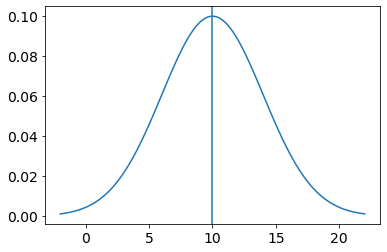

In [126]:
plt.plot(x, y)
plt.axvline(mu)

La distribución esperada de la media es $N(\mu, \frac{\sigma^2}{N})$

In [127]:
Sn = sigma / np.sqrt(N)
x = np.linspace(mu-3*Sn, mu+3*Sn, 100)
Gm = st.norm(loc=mu, scale=Sn)
ym = Gm.pdf(x)

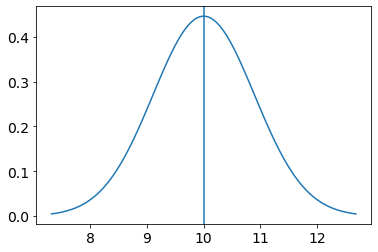

In [128]:
plt.plot(x, ym)
plt.axvline(mu)

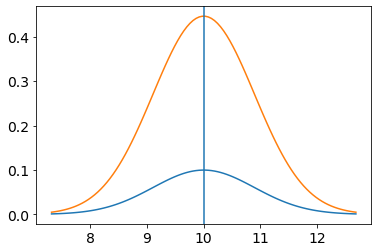

In [129]:
plt.plot(x, y)
plt.plot(x, ym)
plt.axvline(mu)

Sorteamos muestras aleatorias:

In [130]:
M = 1000        # cantidad de experimentos
rmean = []
rsd = []
for i in range(M):
    r = G.rvs(size=N)
    rmean.append(r.mean())
    rsd.append(r.std())

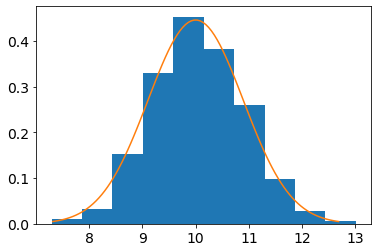

In [131]:
plt.hist(rmean, density=True)
plt.plot(x, Gm.pdf(x))

In [140]:
M = 1000        # cantidad de experimentos

N = 8
Sn = sigma / np.sqrt(N)
Gm = st.norm(loc=mu, scale=Sn)

rmean = []
rsd = []
for i in range(M):
    r = G.rvs(size=N)
    rmean.append(r.mean())
    rsd.append(r.std())

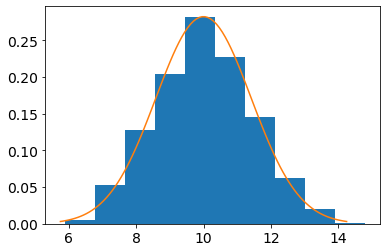

In [145]:
plt.hist(rmean, density=True)
x = np.linspace(mu-3*Sn, mu+3*Sn, 100)
plt.plot(x, Gm.pdf(x))

In [146]:
rmean.sort()

q = np.linspace(0, 1, M)

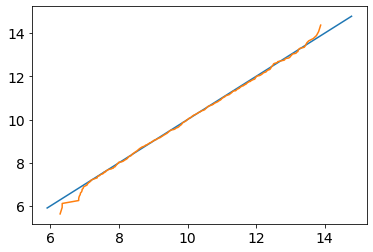

In [147]:
plt.plot(rmean,rmean)
plt.plot(rmean, Gm.ppf(q))

In [ ]:
x = seq(mu-3*sigma, mu+3*sigma, l=100)
y = dnorm(x,mu,sigma)

In [140]:
par(mar=c(0,0,0,0)+.1)
par(oma=c(1,1,0,0))
library(repr)
options(repr.plot.width=8, repr.plot.height=4)

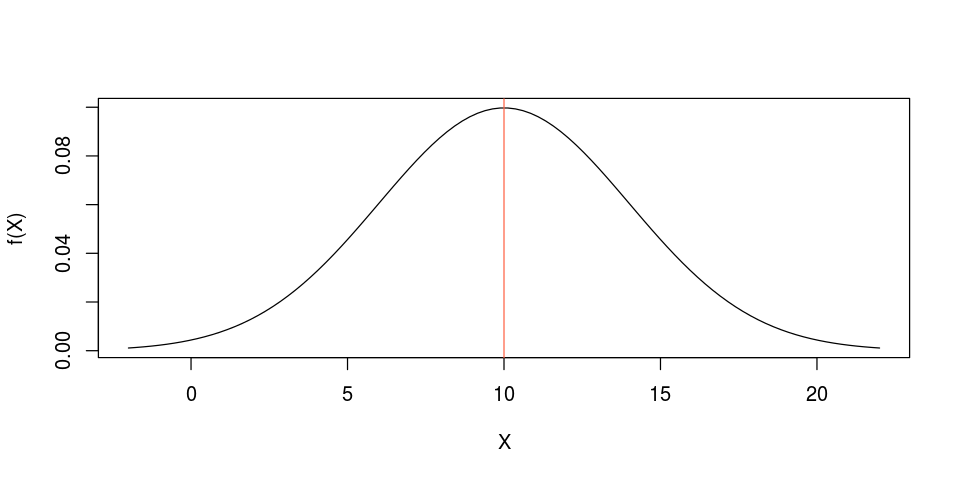

In [141]:
plot(x,y,type='l', xlab='X', ylab='f(X)')
abline(v=mu, col='tomato')

La distribución esperada de la media es $N(\mu, \frac{\sigma^2}{N})$

In [142]:
Sn = sigma / sqrt(N)
x = seq(mu-3*Sn, mu+3*Sn, l=100)
y = dnorm(x,mu,Sn)

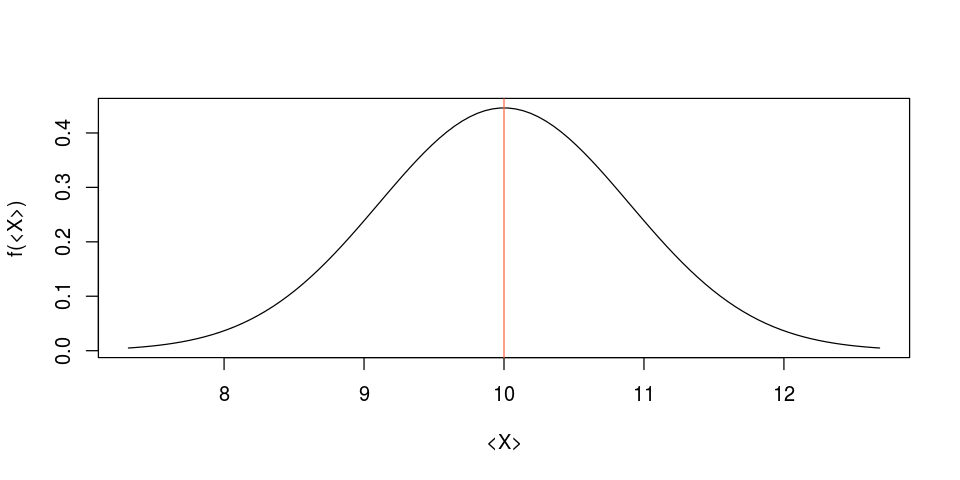

In [143]:
plot(x,y,type='l',xlab='<X>',ylab='f(<X>)')
abline(v=mu, col='tomato')

In [144]:
l = as.numeric(); r = as.numeric(); t = as.logical()
for (i in 1:M) {
   x = rnorm(N, mu, sigma)
   l = c(l, qnorm(q1,mean(x),sd(x)/sqrt(N))[1])
   r = c(r, qnorm(q2,mean(x),sd(x)/sqrt(N))[1])
   t = c(t, tail(l,1)<mu & tail(r,1)>mu)
}

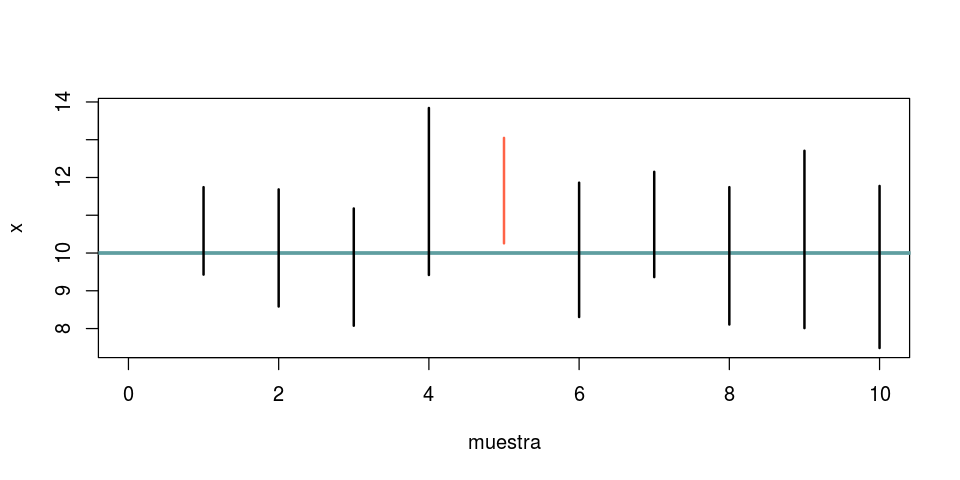

In [145]:
ymin = min(l)
ymax = max(r)
plot(0,0,xlim=c(0,M),ylim=c(ymin, ymax),xlab='muestra',ylab='x')
abline(h=mu, col='cadetblue', lw=3)
for (i in 1:M) {
    if(t[i]) {segments(i,l[i],i,r[i], lwd=2, col='black')}
    if(!t[i]) {segments(i,l[i],i,r[i], lwd=2, col='tomato')}
}

In [135]:
# La fraccion de intervalos que contienen a la media:
sum(t)/length(t)

[1] 0.9

In [146]:
1 - alpha

[1] 0.93

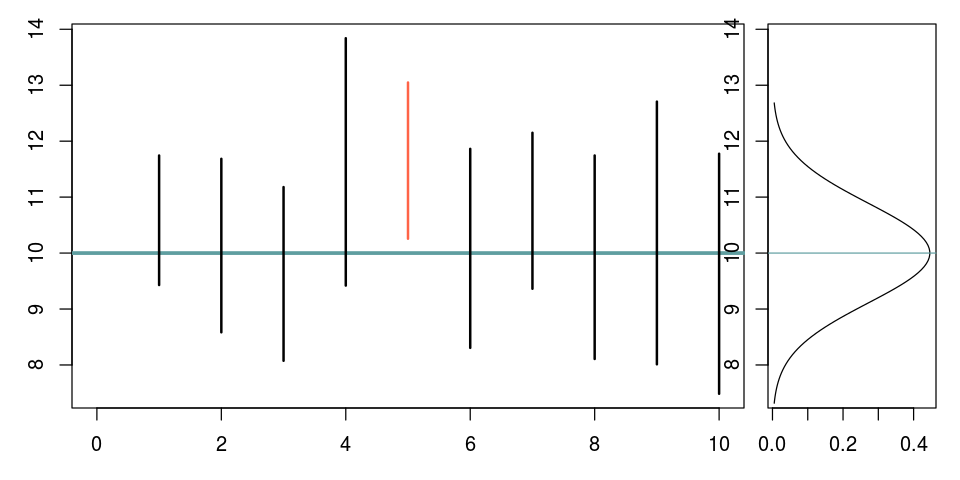

In [147]:
zones=matrix(c(1,2), ncol=2, byrow=TRUE)
layout(zones, widths=c(4/5,1/5), heights=c(1/5,4/5))

par(mar=c(3,3,1,1))
ymin = min(l)
ymax = max(r)
plot(0,0,xlim=c(0,M),ylim=c(ymin, ymax),xlab='muestra',ylab='x')
abline(h=mu, col='cadetblue', lw=3)
for (i in 1:M) {
    if(t[i]) {segments(i,l[i],i,r[i], lwd=2, col='black')}
    if(!t[i]) {segments(i,l[i],i,r[i], lwd=2, col='tomato')}
}

par(mar=c(3,0,1,1))
Sn = sigma / sqrt(N)
x = seq(mu-3*Sn, mu+3*Sn, l=100)
y = dnorm(x,mu,Sn)
plot(y,x,type='l',ylim=c(ymin, ymax))
abline(h=mu, col='cadetblue')

par(oma=c(3,3,0,0))